# K-Nearest Neighbors Classification Model
#### CS 4641 - Machine Learning
#### Seuyoung Chung

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt

## Preparing Data to fit to the KNN model

In [2]:
file_out = pd.read_csv('.\data_filled.csv')
label = pd.read_csv('.\labels_filled.csv')

In [3]:
#* target labels
label = label.iloc[:].values
label = np.ravel(label) #reshape to (N,)

#* feature 1: symptoms score
#* sum all of the symptoms (cough, fever,sore_throat, shortness_of_breath, head_ache)
x1 = file_out.iloc[:, 0:5].values 
x1 = np.sum(x1, axis = 1) 

#* feature 2: contact status (Contact with confirmed, Abroad, Other)
x2 = file_out.iloc[:, 7].values 

#placeholder for features

# features = np.zeros((len(x1), 2))
# features[:, 0] = x1
# features[:, 1] = x2

features = np.zeros((len(x1), 2))
features[:, 0] = x1
features[:, 1] = x2

Now, split the data into trainig dataset and testing dataset.

In [4]:
X = features
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

I will examine accuracy, precision, recall, and F_beta score for KNN classifiers using different number of nearest neighbors

In [5]:
# numbers of nearest neighbors used to fit the training
neighbor_list = [3, 5, 7, 9, 11]

# lists to store values
accuracy = []
precision = []
recall = []
f_beta = []

## Training the Testing Data

In [6]:
for i in range(len(neighbor_list)):
    sklearn_classifier = KNeighborsClassifier(n_neighbors=neighbor_list[i]).fit(X_train, y_train)
    
    #* Prediction of the labels
    y_pred = sklearn_classifier.predict(X_test) 

    accuracy.append(sklearn_classifier.score(X_test, y_test))

    #* precision, recall, fbeta_score, number of occurences for each label
    arr = precision_recall_fscore_support(y_test,y_pred, average='binary')
    precision.append(arr[0])
    recall.append(arr[1])
    f_beta.append(arr[2])

## Plotting Evalution Scores for Each K Number of Nearest Neighbors

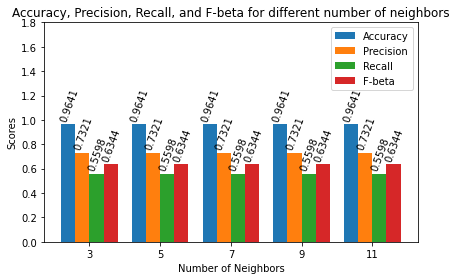

In [42]:
#* Plot a bar graph of accuracy, precision, recall, and F-beta for different number of neighbors
x = np.arange(len(neighbor_list)) # the label locations
width = 0.2 # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f_beta, width, label='F-beta')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Number of Neighbors')
ax.set_title('Accuracy, Precision, Recall, and F-beta for different number of neighbors')
ax.set_xticks(x)
ax.set_xticklabels(neighbor_list)
ax.set_yticks(np.arange(0.0,2.0,0.2))
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(1, 1.5),  #offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=70)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

## Finding the Optimal Value for K using Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Creating odd list K for KNN
neighbors = list(range(11,50,2))

# empty list that will hold cv scores
cv_scores = [ ]

In [24]:
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

In [26]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]

# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal # of neighbors is {}".format(optimal_k))

The optimal # of neighbors is 43


### Graph for Deciding which k to use

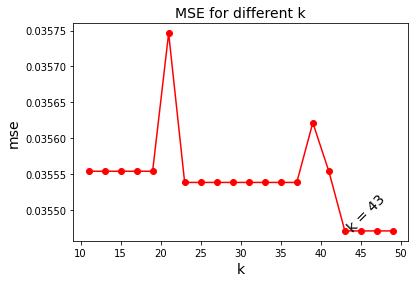

In [41]:
plt.plot(neighbors, mse, color='red', marker='o')
plt.title('MSE for different k', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.ylabel('mse', fontsize=14)
plt.text(43, mse[16], 'k = 43', rotation=45, fontsize=14)
plt.show()

## Training the model with k = 43 and Evaluating

In [28]:
sklearn_classifier = KNeighborsClassifier(n_neighbors=43).fit(X_train, y_train)

#* Prediction of the labels
y_pred = sklearn_classifier.predict(X_test) 

accuracy = sklearn_classifier.score(X_test, y_test)

#* precision, recall, fbeta_score, number of occurences for each label
arr = precision_recall_fscore_support(y_test,y_pred, average='binary')
precision = arr[0]
recall = arr[1]
f_beta = arr[2]

In [29]:
print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F-beta: {}".format(f_beta))

Accuracy: 0.964079188235722
Precision: 0.7320615034168565
Recall: 0.5597648595689092
F-beta: 0.6344231955582973
